<a href="https://colab.research.google.com/github/KayvanShah1/usc-dsci-552-lab-assignments-hw/blob/main/assignment-4/Assignment_4_Decision_Tree_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - 4
- Construct Decision Tree in an .ipynb file

## Decision Tree
Create a decision tree based on the "Discount" and "Holiday" variables to predict the value of
"Purchase". Using weighted gini index as the splitting criteria and show the resulting leaf nodes
for each branch of the tree. For the root and each node of the decision tree, calculate the gini
index, sample size, and sample distribution.

Hint: Sample distribution = [a,b] where a is the number of “yes” of target value in the current
sample, b is the number of “no” of target value in the current sample.

In [43]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

### Data Extraction

In [12]:
# Data copied from the PDF file
header = """Holiday Discount Purchase"""
data = """No Yes Yes
No Yes Yes
No No No
Yes Yes Yes
Yes Yes Yes
Yes No No
Yes Yes Yes
No Yes Yes
Yes Yes Yes
Yes Yes Yes
Yes No Yes
Yes No No
Yes Yes Yes
Yes Yes Yes
Yes Yes Yes
No Yes Yes
Yes No Yes
No Yes Yes
Yes No Yes
Yes No Yes
No Yes Yes
Yes Yes No
Yes No Yes
No Yes Yes
yes No No
No No No
No Yes Yes
No Yes Yes
yes Yes Yes
yes Yes Yes""".lower()

# Split the header string into list
header = header.split()
# Split the data string into list of list
data = [i.split() for i in data.splitlines()]

### Data Preparation

In [19]:
df = pd.DataFrame(data=data, columns=header)
print("Size of dataframe:", df.shape)

# Map "yes" to 1 & "no" to 0
df = df.replace({"yes": 1, "no": 0})
df.head()

Size of dataframe: (30, 3)


,Holiday,Discount,Purchase
0,0,1,1
1,0,1,1
2,0,0,0
3,1,1,1
4,1,1,1


### Fit a decision tree model

In [27]:
X = df.loc[:, ["Holiday", "Discount"]]
y = df.loc[:, ["Purchase"]]

clf = DecisionTreeClassifier(
    criterion='gini', splitter='best', random_state=0
)
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

### Plot Decision Tree

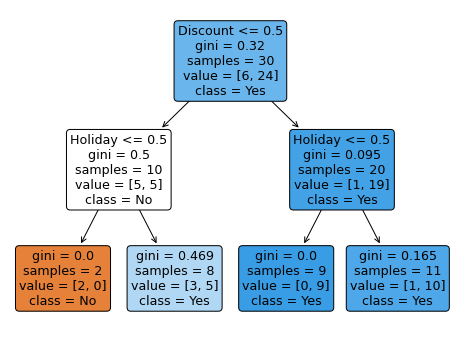

In [50]:
feature_names = ["Holiday", "Discount"]
class_names = ["No", "Yes"]

plt.figure(figsize=(8, 6))
_ = plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)